Mean Rating: 4.35
Maximum Price: 1.7
Review Count per Cafe: cafeId
0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: count, dtype: int64
Correlation between Rating and Price: rating    0.228326
dtype: float64
Variance of Rating: 0.5410256410256411


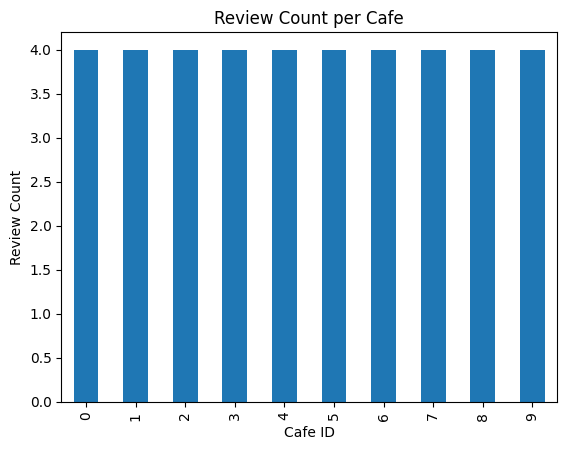

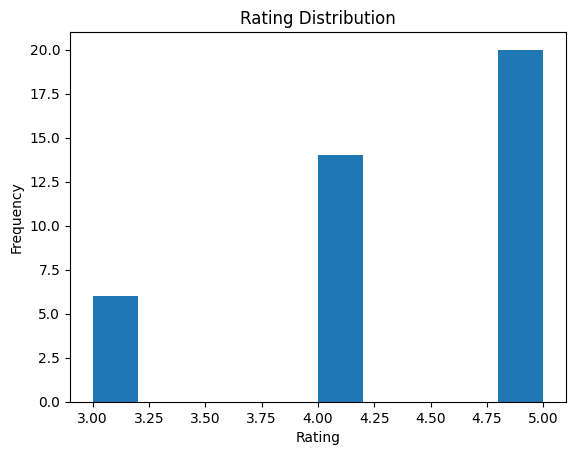

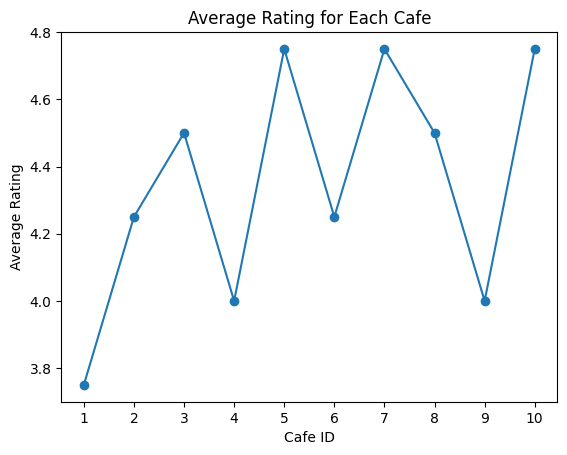

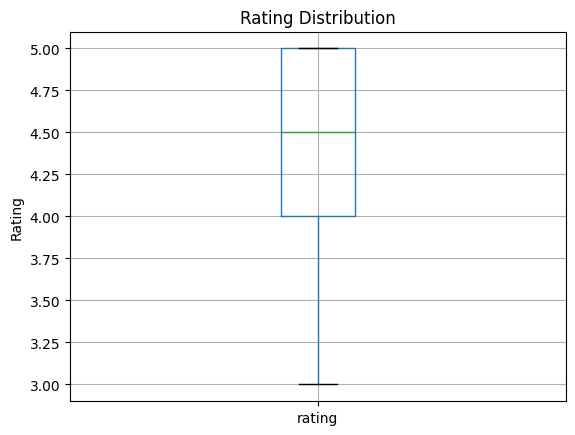

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3

connection = sqlite3.connect('./database/database.db')

cd = pd.read_sql('SELECT * FROM cafes', connection)
rd = pd.read_sql('SELECT * FROM reviews', connection)
bd = pd.read_sql('SELECT * FROM beverages', connection)

cafes_df = pd.DataFrame(cd)
reviews_df = pd.DataFrame(rd)
beverages_df = pd.DataFrame(bd)

# Basic statistics
mean_rating = reviews_df['rating'].mean()
max_price = beverages_df['price'].max()
review_count_per_cafe = reviews_df['cafeId'].value_counts()
correlation = reviews_df[['rating']].corrwith(beverages_df['price'])
variance_rating = reviews_df['rating'].var()

print("Mean Rating:", mean_rating)
print("Maximum Price:", max_price)
print("Review Count per Cafe:", review_count_per_cafe)
print("Correlation between Rating and Price:", correlation)
print("Variance of Rating:", variance_rating)


# Bar chart
review_count_per_cafe.plot(kind='bar', xlabel='Cafe ID', ylabel='Review Count', title='Review Count per Cafe')
plt.show()

# Histogram
reviews_df['rating'].plot(kind='hist', bins=10, xlabel='Rating', ylabel='Frequency', title='Rating Distribution')
plt.show()

# Line plot
average_rating_per_cafe = reviews_df.groupby('cafeId')['rating'].mean()
x = np.arange(1, len(average_rating_per_cafe) + 1)
plt.plot(x, average_rating_per_cafe, marker='o')
plt.xlabel('Cafe ID')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Cafe')
plt.xticks(x)
plt.show()

# Box plot
reviews_df.boxplot(column='rating')
plt.ylabel('Rating')
plt.title('Rating Distribution')
plt.show()

# Conclusions
print('Conclusions:\n')
print('The mode rating for the top 10 cafes on Yelp in NY is 5, indicating that these cafes exhibit consistently high ratings.\n')
print('The ratings of cafes within the top 10 on Yelp in NY predominantly fall within the range of 3 to 5, suggesting a typical pattern of positive reviews.\n')
print('The correlation coefficient of 0.22 between average beverage price and average rating suggests a weak association, implying limited influence of price on customer reviews.\n')
